### Importing the Librabries

In [13]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

### Importing The Data

In [2]:
df=pd.read_csv(r"C:\Users\SK\Downloads\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [18]:
ham_words=' '.join(df[df['Category']=='ham']['Message'].values)
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

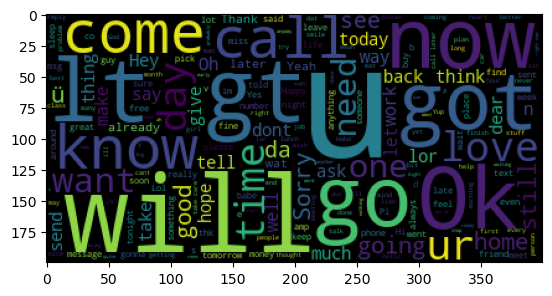

In [19]:
ham_plot=WordCloud().generate(ham_words)
plt.imshow(ham_plot)

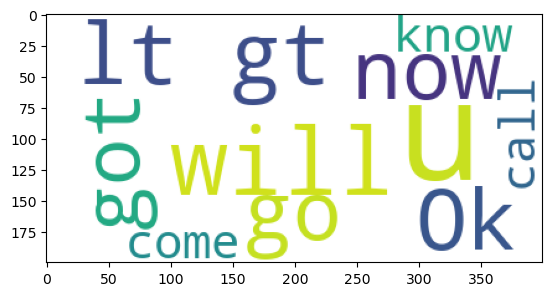

In [4]:
ham_words=' '.join(df[df['Category']=='ham']['Message'].values)
ham_plot=WordCloud(max_words=10,background_color='white').generate(ham_words)
plt.imshow(ham_plot)

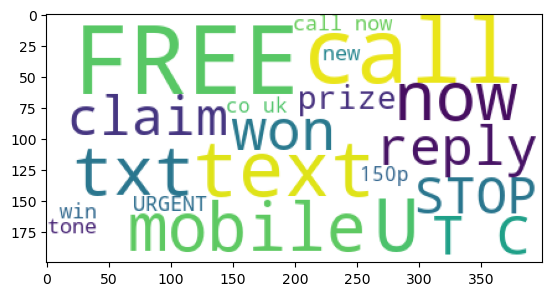

In [5]:
spam_words=' '.join(df[df['Category']=='spam']['Message'].values)
spam_plot=WordCloud(min_font_size=10,max_words=20,background_color='white').generate(spam_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

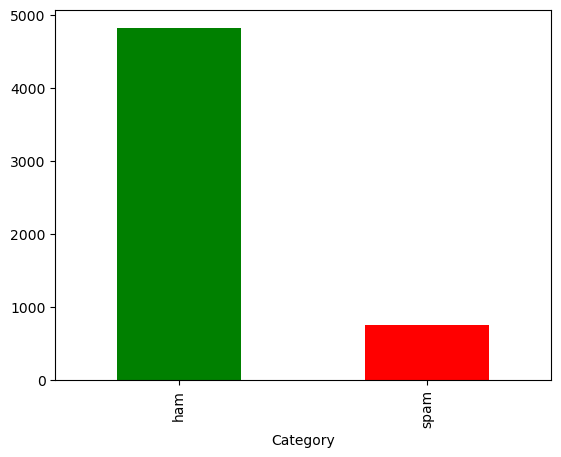

In [6]:
df['Category'].value_counts().plot(kind='bar',color=['green','red'])

### Bag Of Words (BOW)

In [7]:
bow=CountVectorizer(stop_words='english')

In [8]:
bow.fit(df['Message'])
X=bow.transform(df['Message']).toarray()
y=df['Category']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

### KNN

In [11]:
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

### Navie Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

In [13]:
import pickle

In [14]:
pickle.dump(nb,open("model.pkl",'wb'))

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9650224215246637

### SVM

In [49]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
accuracy_score(y_test,y_pred)

0.9775784753363229

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

In [17]:
bow=CountVectorizer(stop_words='english')
bow.fit(df['Message'])
X=bow.transform(df['Message']).toarray()
pickle.dump(bow,open("model1.pkl","wb"))

TypeError: 'numpy.ndarray' object is not callable